In [1618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import datetime as dt
import warnings


warnings.filterwarnings('ignore') # to ignore the warnings

In [1619]:
#loading the loan data and converting it into DataFrame
loan_df = pd.read_csv('loan.csv')


# 1. <u> Data Cleanin</u>g

### 1.a) To find out total rows and Find if there is any Header and Footer rows and delete it.

In [1620]:
# finding Header and Summary rows
loan_df.head()
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1621]:
# finding Footer rows
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1622]:
#total row =39717 and total column =111
loan_df.shape

(39717, 111)

In [1623]:
total_rows = len(loan_df)
total_rows

39717

In [1624]:
# To find whether there is any unnecessary rows or not, and if yes then drop it.
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [1625]:
# Since the 'Current' application of loan doesn't fit for the present criteria, we have to drop it.
loan_df=loan_df[loan_df['loan_status'] != 'Current']
print("rows now:",len(loan_df))

rows now: 38577


In [1626]:
#rows deleted in percentage
# (total rows - length after dropping)/total rows *100
rows_deleted = (total_rows - len(loan_df))/total_rows*100
print("% of rows deleted: ", round(rows_deleted,2))

% of rows deleted:  2.87


In [1627]:
# find duplicate rows, if any then delete it.
duplicate_rows = len(loan_df[loan_df.duplicated()])

In [1628]:
duplicate_rows

0

###### <u>By far we have looked for Header , Footer, Summary, Unnecessary and Duplicate rows and delete them</u>.

### 1.b) fixing columns and deleting the unnecessary columns.

In [1629]:
# Information about data
loan_df.shape

(38577, 111)

In [1630]:
#To find out that how many columns have null or blank values
(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [1631]:
#Columns that have blank or null values
print("Columns with vaues NA:",len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns =list(loan_df.columns[loan_df.isna().all()])
print("NA columns list:")
na_columns

Columns with vaues NA: 55
NA columns list:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [1632]:
#Removing all the Columns having na values as row from the data
loan_df = loan_df.dropna(axis =1, how ="all")
#Since we have to remove columns we are taking axis = 1
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [1633]:
#Removing all the columns who have unique values.
unique_col = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_col

['id', 'member_id', 'url']

In [1634]:
#Removing member id and url and keeping id for further analysis.
loan_df.drop(['member_id','url'],axis =1 , inplace = True)

In [1635]:
loan_df.shape

(38577, 54)

In [1636]:
#columns with text is of no use so dropping them as well.
loan_df.drop(['desc','title'],axis = 1,inplace = True)

In [1637]:
loan_df.shape

(38577, 52)

In [1638]:
loan_df = loan_df.drop(['sub_grade'],axis=1)


In [1639]:
#below data is not relevant for the loan process application, so we take that under behaviour data.
behaviour_cols = ['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_bal', 'revol_util', 'total_acc', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d', 
                          'application_type']
loan_df = loan_df.drop(behaviour_cols, axis =1)

In [1640]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [1641]:
#Removing columns with value = 1

for c in loan_df.columns:
    if loan_df[c].nunique(dropna=True) == 1:
        print(c)
        loan_df = loan_df.drop(c, axis=1)
    

# Drop all constant columns from df1 (definition of constant is constant value across the rows, this ignores Na values)
print("-x-x-x-x-x-x-x-x")
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-x-x-x-x-x-x-x-x


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [1642]:
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:   ## Drop columns whose null values exceed 50%
        print(column)
        loan_df = loan_df.drop(column,axis=1)


mths_since_last_delinq
mths_since_last_record


In [1643]:
loan_df.shape

(38577, 20)

In [1644]:
#removing emp_title as it is unnecessary for the exploratory data analysis
loan_df =loan_df.drop(['emp_title'],axis=1)

# 2. <u>Data Conversion</u>

In [1645]:
loan_df.dtypes


id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [1646]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [1647]:
# convert term type from string to int :-
def convert_term(term):
    return int(term.strip().split()[0])


loan_df['term']= loan_df['term'].apply(convert_term)
loan_df['term'].dtype

dtype('int64')

In [1648]:
loan_df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [1649]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [1650]:
# convert int_rate from string to float.
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)


In [1651]:
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [1652]:
#convert the column loan_funded_amnt and funded_amnt as float
loan_df = loan_df.astype({'loan_amnt': 'float','funded_amnt': 'float'})
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [1653]:
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [1654]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [1655]:
# Round off the values to 2 decimal place.
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[c] = loan_df[c].apply(lambda x: round(x,2))
    print(loan_df[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [1656]:
#Converting the column issue_d to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [1657]:
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

# 3. <u>Dropping or Imputing rows</u>


In [1658]:
#Dropping the null rows for emp_length and pub_rec_bankruptcies columns.
before_rows = len(loan_df)
before_rows

38577

In [1659]:
loan_df=loan_df[loan_df['emp_length'].notna()]
loan_df=loan_df[loan_df['pub_rec_bankruptcies'].notna()]


In [1660]:
#current rows
current_row =len(loan_df)
current_row

36847

In [1661]:
total_deleted = ((before_rows-current_row)*100)/before_rows
print("% of deleted rows:",round(total_deleted,2))
print(loan_df.shape)

% of deleted rows: 4.48
(36847, 19)


In [1662]:
#no more na values left
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [1663]:
def strip_emp_length(x):
    x=x.strip("years")
    x=x.strip("<")
    x=x.replace(" ","")
    x=x.replace("+","")
    return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x: strip_emp_length(x))

In [1664]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


# 4. <u> Derived Columns</u>

In [1665]:
#Creating Derived columns by taking month and year from issue_date
loan_df['issue_year']= pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']= pd.DatetimeIndex(loan_df['issue_d']).month


(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

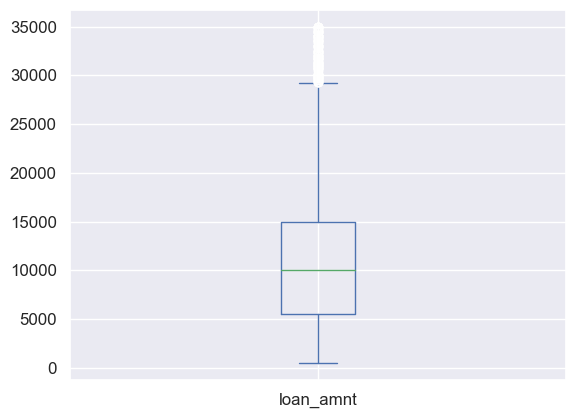

In [1666]:
print(loan_df.shape)
print(loan_df["loan_amnt"].describe())
loan_df['loan_amnt'].plot(kind='box')

# 5. <u>Univariate Analysis</u>

In [1667]:
#Performing metadata for the columns
column_titles={
'loan_amnt' :'Loan Amount',          
'funded_amnt' :'Funded Amount' ,             
'funded_amnt_inv' :'Funded Amount Investors',        
'term' : 'Term',                                                                                                                       
'int_rate' :'Interest Rate',                
'installment' : 'Installment',           
'grade' : 'Grade',                  
'emp_length' : 'Employment Length',             
'home_ownership' : 'Home Ownership',         
'annual_inc' : 'Annual Income',            
'verification_status' : 'Verification Status',    
'issue_d' : 'Issue Date',                
'loan_status' : 'Loan Status',            
'purpose' : 'Purpose of Loan',                               
'addr_state' : 'State',             
'dti' : 'Debt To Income Ratio' ,               
'pub_rec_bankruptcies': 'Bankruptcies Record',
'issue_y' : 'Issue Year',
'issue_m' : 'Issue Month',
'issue_q' : 'Issue Quarter',
'loan_amnt_b' : 'Loan Amount Bins',
'funded_amnt_inv_b' : 'Investor Funded Bins',
'funded_amnt_b' : 'Funded Amount Bins',
'annual_inc_b' : 'Annual Income Bins',
'int_rate_b' : 'Interest Rate Bins',
'dti_b': 'DTI Bins'
}


In [1668]:
#Bucketing different variables for better analysis

In [1669]:
#Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5k' # 25% quartile
    elif (column >5000) and (column <=10000):
        return '5k - 10k'
    elif (column >10000) and (column <=15000):
        return '10k - 15k'
    else:
        return '15k - above' #75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x: bucket_loan_amnt(x['loan_amnt']), axis=1)
        

In [1670]:
#Bucketting Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <=50000):
        return '40k - 50k'
    elif (column >50000) and (column <=60000):
        return '50k to 60k'
    elif (column >60000) and (column <=70000):
        return '60k to 70k'
    elif (column >70000) and (column <=80000):
        return '70k to 80k'
    else:
        return '80k - above' #75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis=1)
    
    

In [1671]:
#Bucketting Interest Rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <=11):
        return 'Low'
    elif (column >11) and (column <=13):
        return 'Moderate'
    elif (column >13) and (column <=15):
        return 'High'
    else:
        return 'Very High' #75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x: bucket_int_rate(x.int_rate), axis=1)

In [1672]:
#Bucketting dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <=12):
        return 'Low'
    elif (column >12) and (column <=16):
        return 'Moderate'
    elif (column >16) and (column <=20):
        return 'High'
    else:
        return 'Very High' #75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x: bucket_dti(x.dti), axis=1)    

In [1673]:
#Univarients function
def plot_diagram(df, column):
    fig, p = plot.subplots(1,2, figsize =(16,4))
    sns.distplot(df.loc[df[column].notnull(), column], kde= True, hist=True,ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

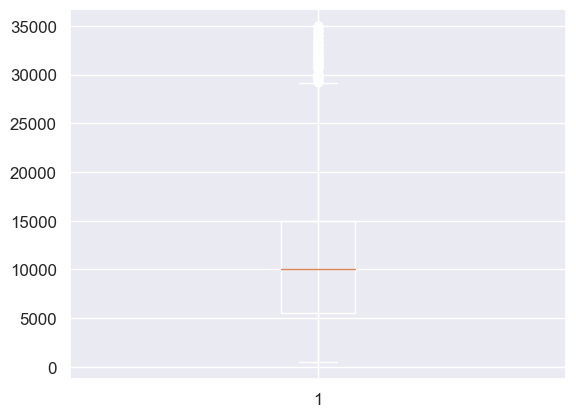

In [1674]:
plot.boxplot(loan_df['loan_amnt'],)
plot.show()

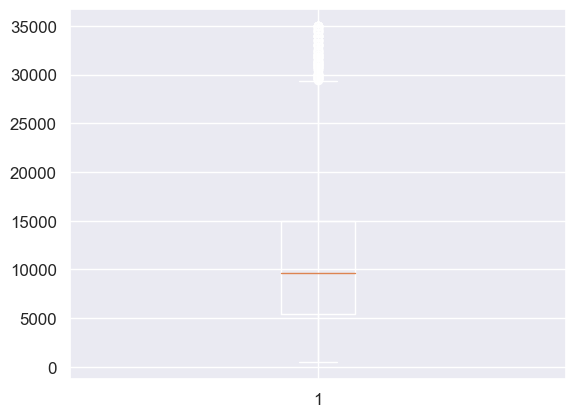

In [1675]:
plot.boxplot(loan_df['funded_amnt'],)
plot.show()

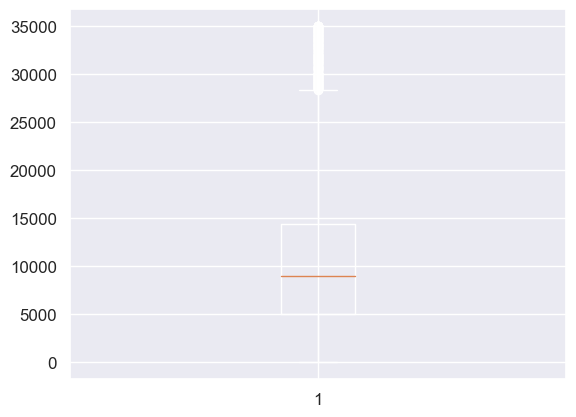

In [1676]:
plot.boxplot(loan_df['funded_amnt_inv'],)
plot.show()

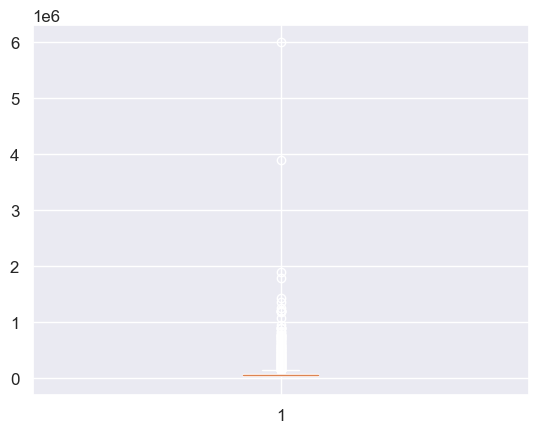

In [1677]:
plot.boxplot(loan_df['annual_inc'],)
plot.show()

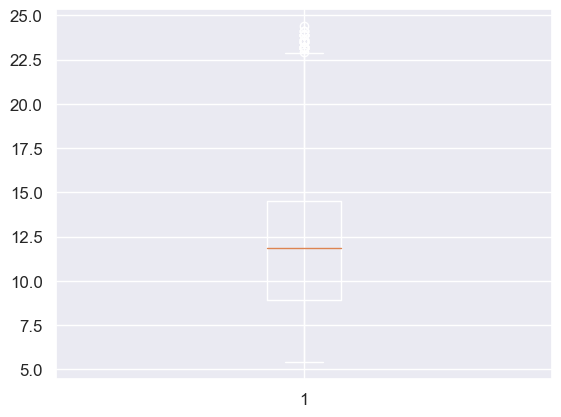

In [1678]:
plot.boxplot(loan_df['int_rate'],)
plot.show()

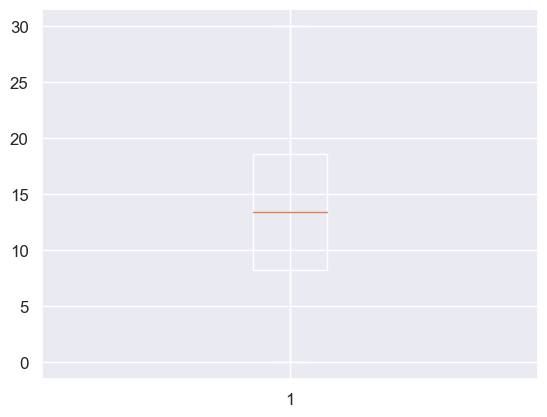

In [1679]:
plot.boxplot(loan_df['dti'],)
plot.show()

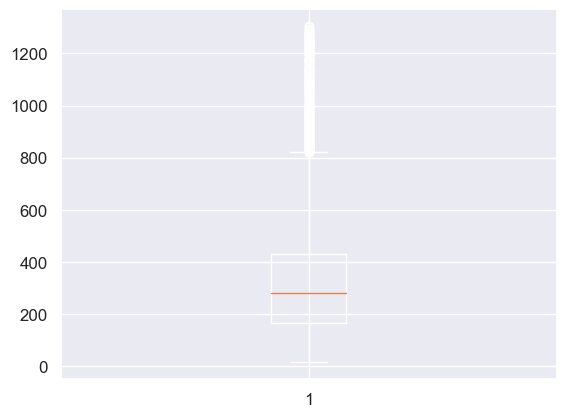

In [1680]:
plot.boxplot(loan_df['installment'],)
plot.show()

In [1681]:
#The most important part of the data is to remove outliers so that the average falls in correct place
outliers_columns_set1= ['loan_amnt','funded_amnt','funded_amnt_inv']
outliers_columns_set2= ['int_rate','installment','annual_inc']

def remove_outliers_iqr(data,columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1            #interquartile range = quarile3 - quartile1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

#outliers removed
loan_df = remove_outliers_iqr(loan_df,outliers_columns_set1,1.5)
loan_df = remove_outliers_iqr(loan_df,outliers_columns_set2,1.5)                                                   
                                                   


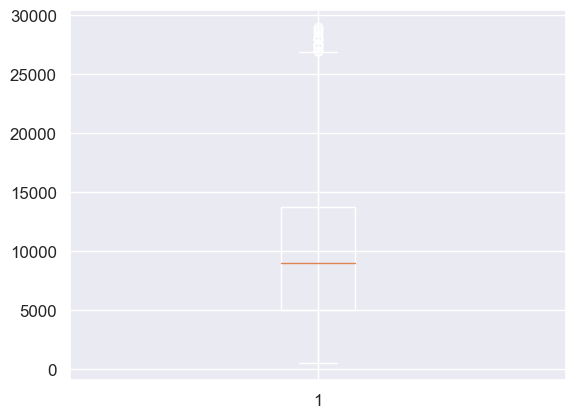

In [1682]:
plot.boxplot(loan_df['loan_amnt'],)
plot.show()

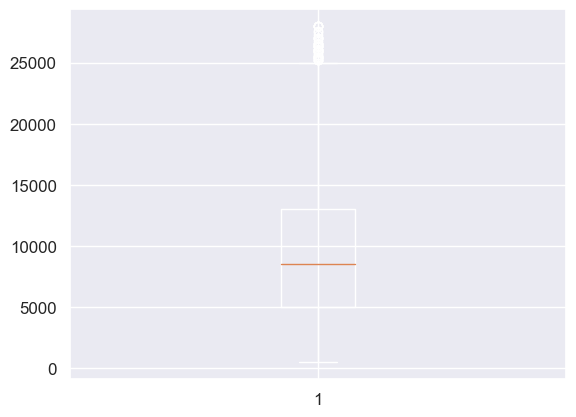

In [1683]:
plot.boxplot(loan_df['funded_amnt'],)
plot.show()

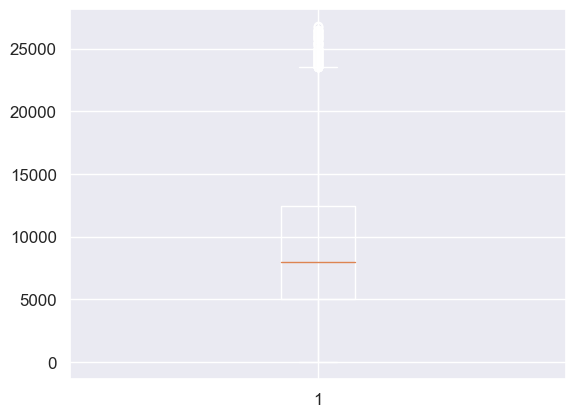

In [1684]:
plot.boxplot(loan_df['funded_amnt_inv'],)
plot.show()

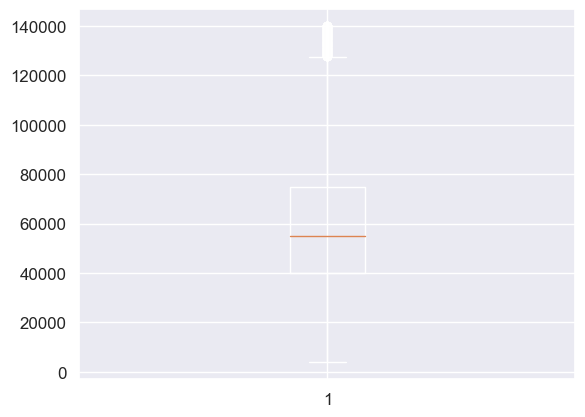

In [1685]:
plot.boxplot(loan_df['annual_inc'],)
plot.show()

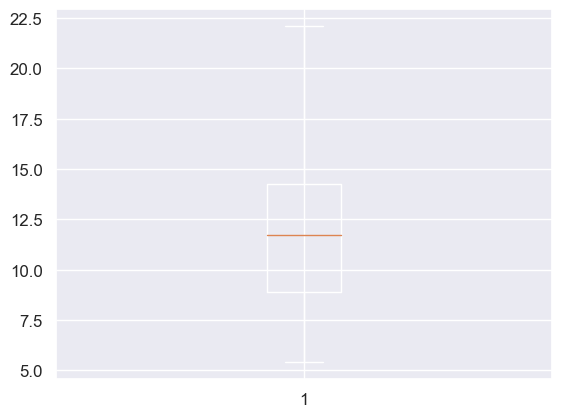

In [1686]:
plot.boxplot(loan_df['int_rate'],)
plot.show()

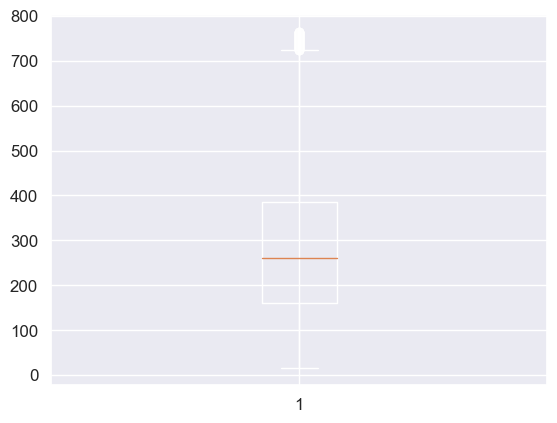

In [1687]:
plot.boxplot(loan_df['installment'],)
plot.show()

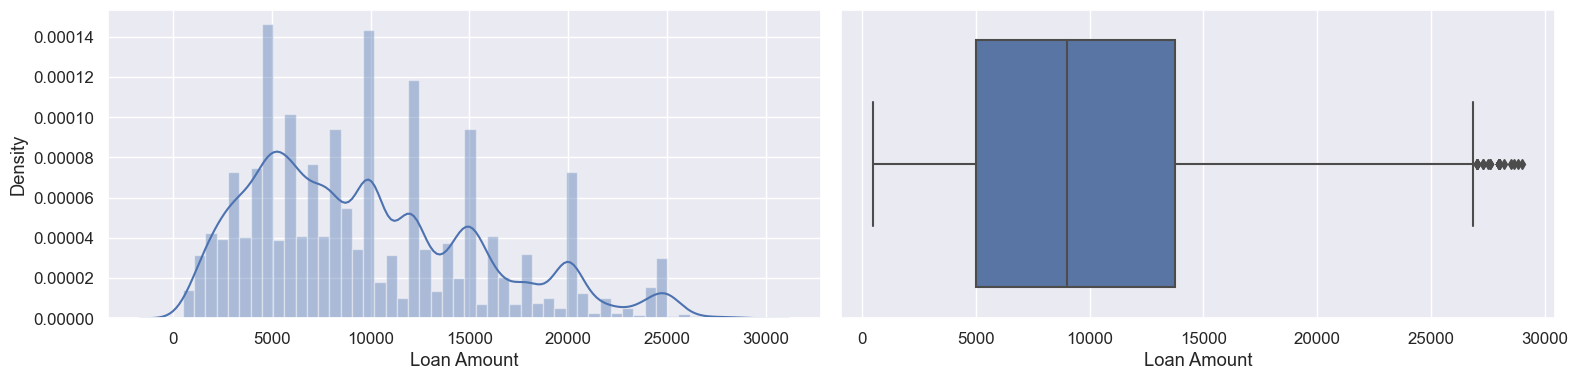

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [1688]:
plot_diagram(loan_df, 'loan_amnt') 
loan_df['loan_amnt'].describe()  # describe the loan amount so that max and min value can be obtained

In [1689]:
#from the above observation we can see that most of the loan applied is between 9k-14k
# max loan  applied is 29k

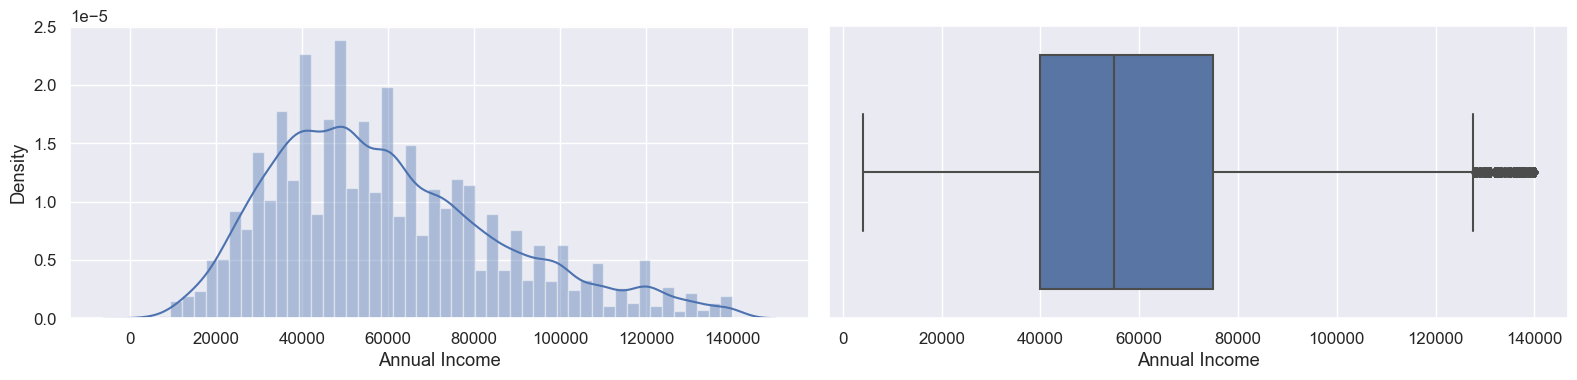

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [1690]:
plot_diagram(loan_df, 'annual_inc') 
loan_df['annual_inc'].describe()    #describe the annual income 

In [1691]:
#avg annual income of the applicants is around 50k-70k

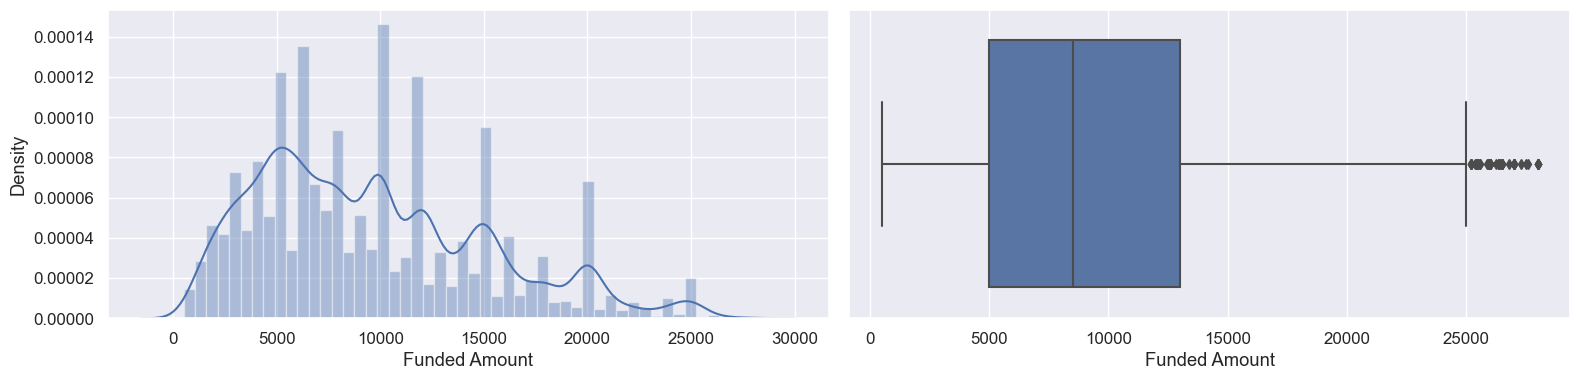

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [1692]:

plot_diagram(loan_df, 'funded_amnt') 
loan_df['funded_amnt'].describe()

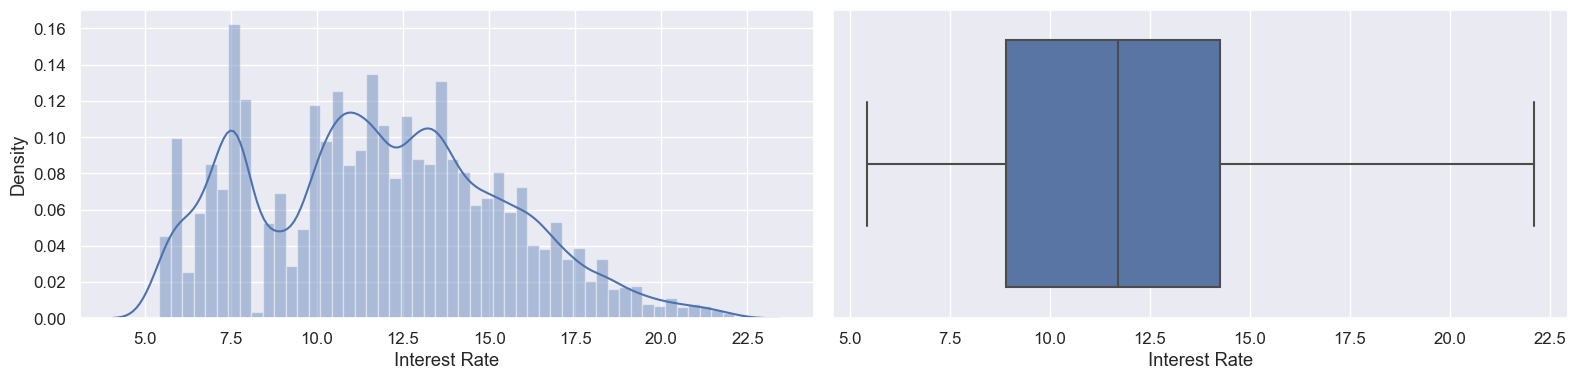

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [1693]:
plot_diagram(loan_df, 'int_rate') 
loan_df['int_rate'].describe()    # describe the interest rate

In [1694]:
#average interest rate of all the applicants is around 11.7%

# 5.2 <u>Unordered Categorical Variable Analysis</u>

<Axes: xlabel='home_ownership'>

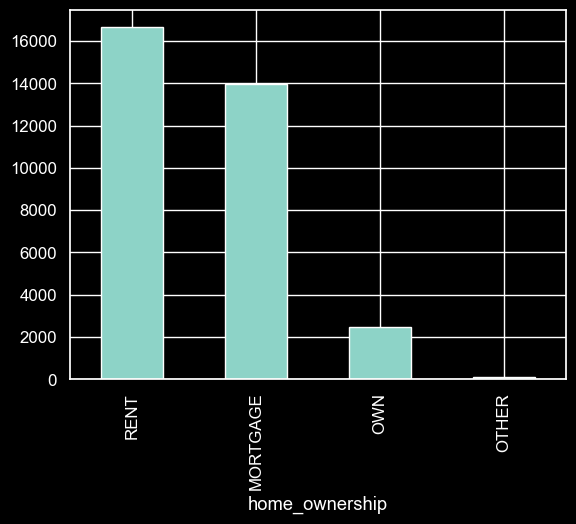

In [1695]:
plot.style.use("dark_background")
loan_df['home_ownership'].value_counts().plot.bar()


In [1696]:
#applicants living on rent and who have mortgage applied more loan request as compare to the one's having their own home.

<Axes: xlabel='purpose'>

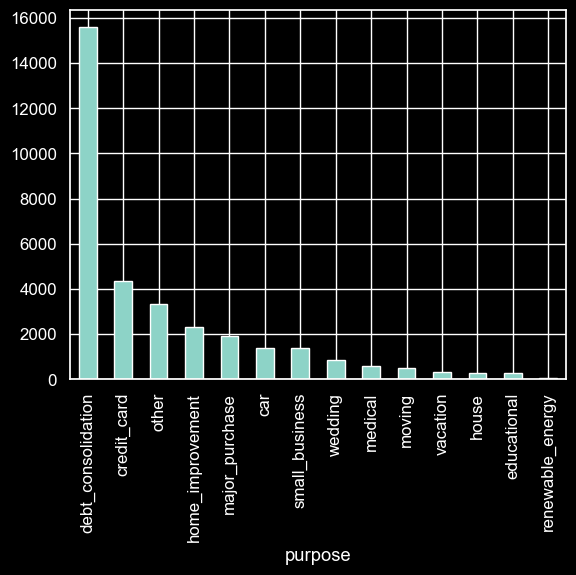

In [1697]:
loan_df['purpose'].value_counts().plot.bar()

In [1698]:
#most of the loan applied is due to debt consolidation followed by credit card.

In [1699]:
failed_per_house_ownership =loan_df
failed_per_house_ownership["loan_status"].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

<Axes: xlabel='addr_state'>

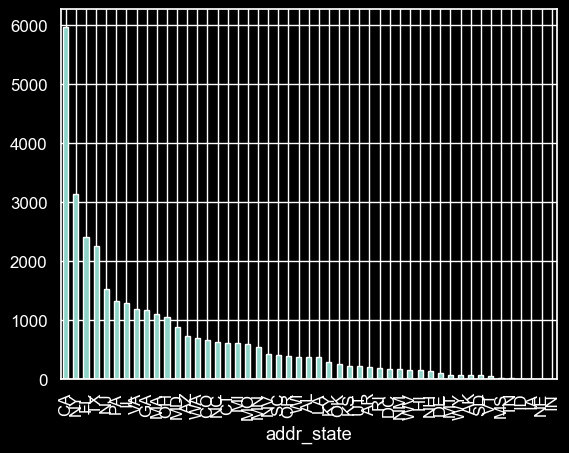

In [1700]:

loan_df['addr_state'].value_counts().plot.bar()

In [1701]:
#max applicant belongs to Ca state than any other state

# 5.3 <u> Ordered Categorical Variable Analysis</u>

<Axes: xlabel='emp_length'>

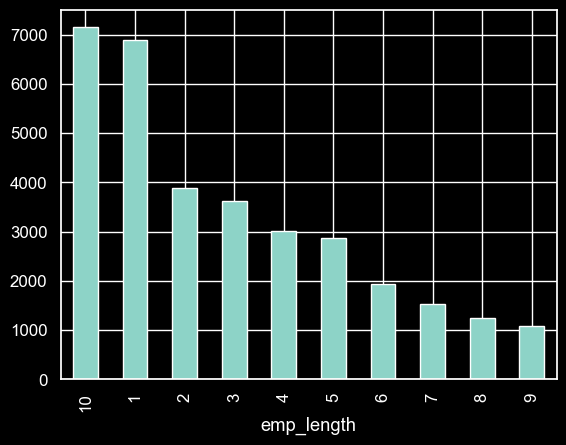

In [1702]:
loan_df['emp_length'].value_counts().plot.bar()

In [1703]:
#more experienced and merely freshers are more inclined towards loan.

# 6. <u>Bivariate Analysis</u>

In [1704]:
#Analysis from annualincome in context of chargedoff proportion

In [1705]:
inc_range_vs_loan = loan_df.groupby(['annual_inc_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion']= inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


In [1706]:
#lets try to visualise data from the above data and draw plots on its basis


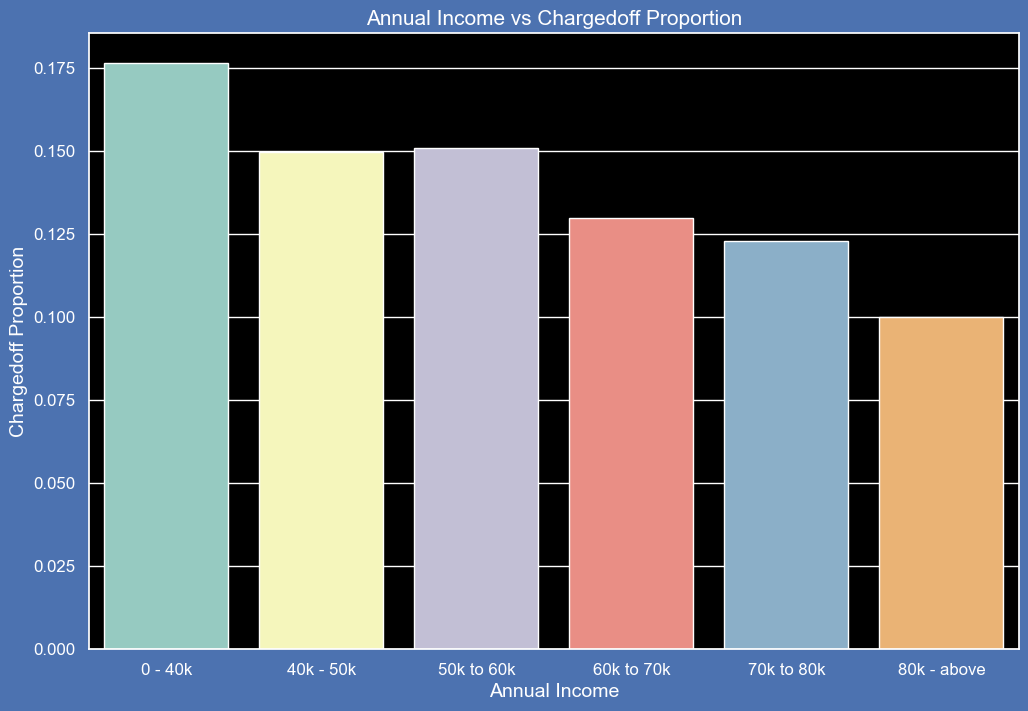

In [1707]:
fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='annual_inc_b',y ='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()

In [1708]:
#from the observation it is easily stated
# 1.) increase income is in negative correaltion with charged off proportion
#income increase leads to decrease chargedoff proportion

In [1709]:
interest_vs_loan = loan_df.groupby(['int_rate_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion']= interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


In [1710]:
#low interest rates leads to decreased charged off proportion whereas, if the interest rates are high then charged off proportion increases

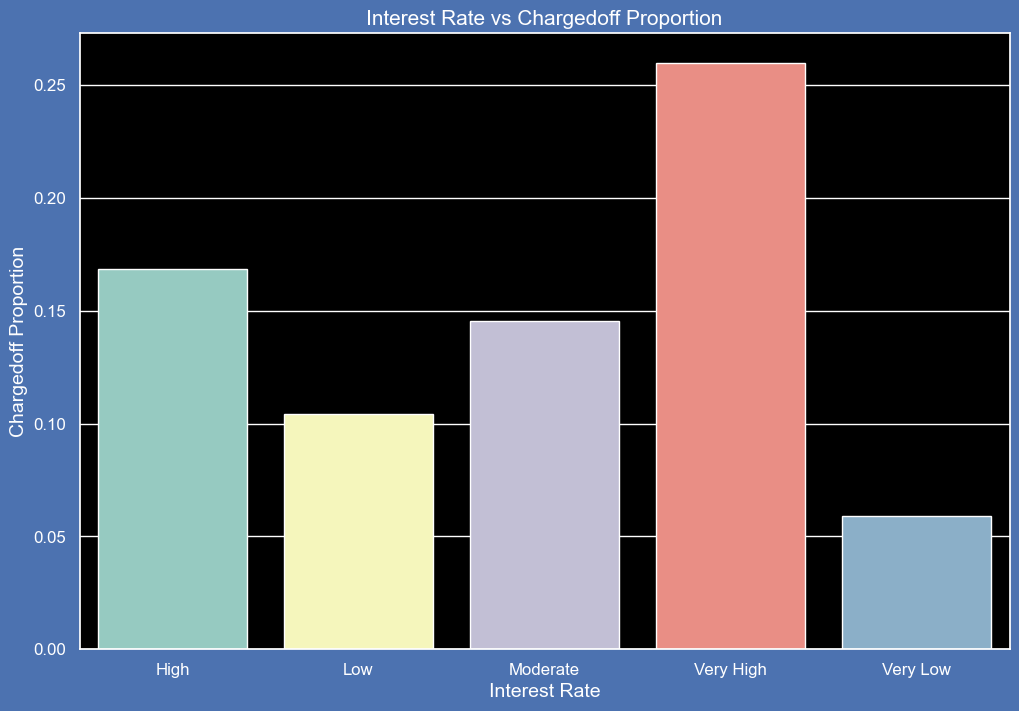

In [1711]:
fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='int_rate_b',y ='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
plot.show()

In [1712]:
home_ownership_vs_loan = loan_df.groupby(['home_ownership','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion']= home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


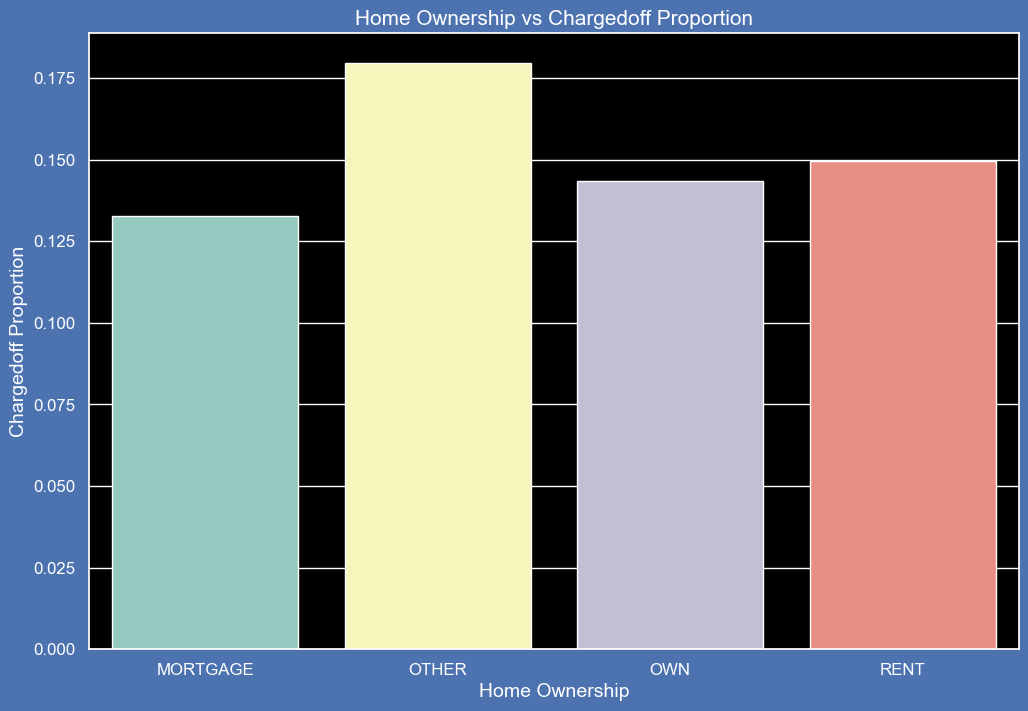

In [1713]:
fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='home_ownership',y ='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
plot.show()

In [1714]:
#owning home leads to less loan defaults as compare to rent and other.

In [1715]:
purpose_vs_loan = loan_df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion']= purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


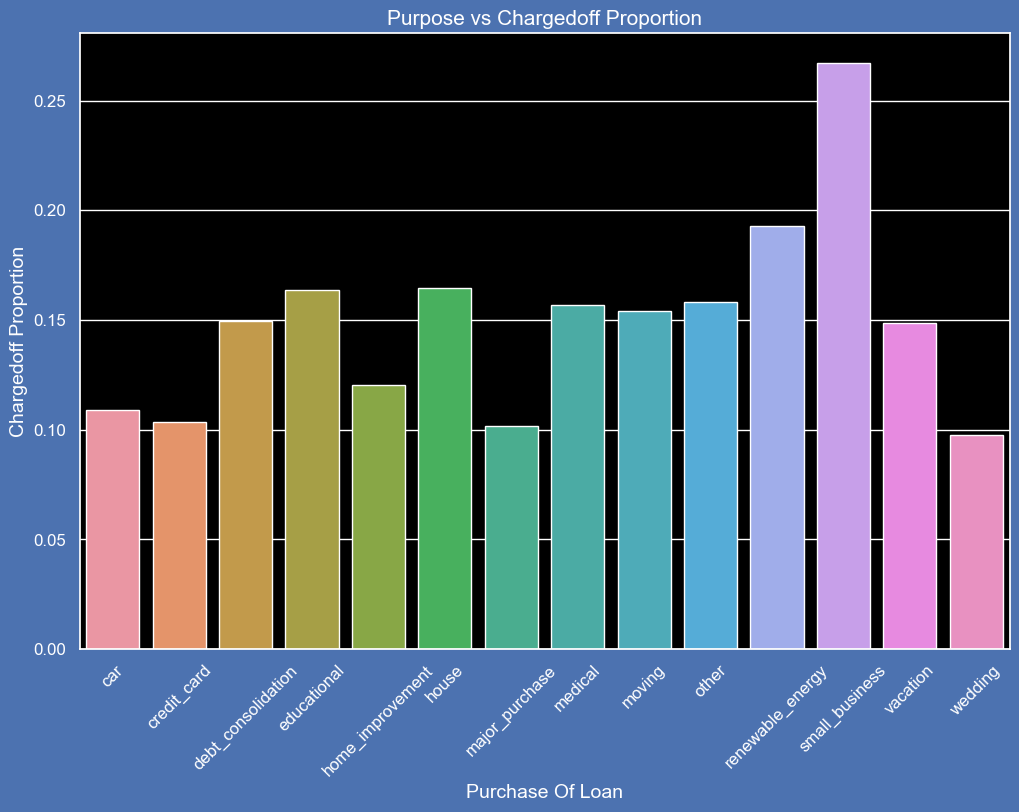

In [1716]:
fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Purpose vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='purpose',y ='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Purchase Of Loan',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [1717]:
#mostly people belongs to the background small business are more inclined towards the defaults.

In [1718]:
dti_vs_loan = loan_df.groupby(['dti_b','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion']= dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


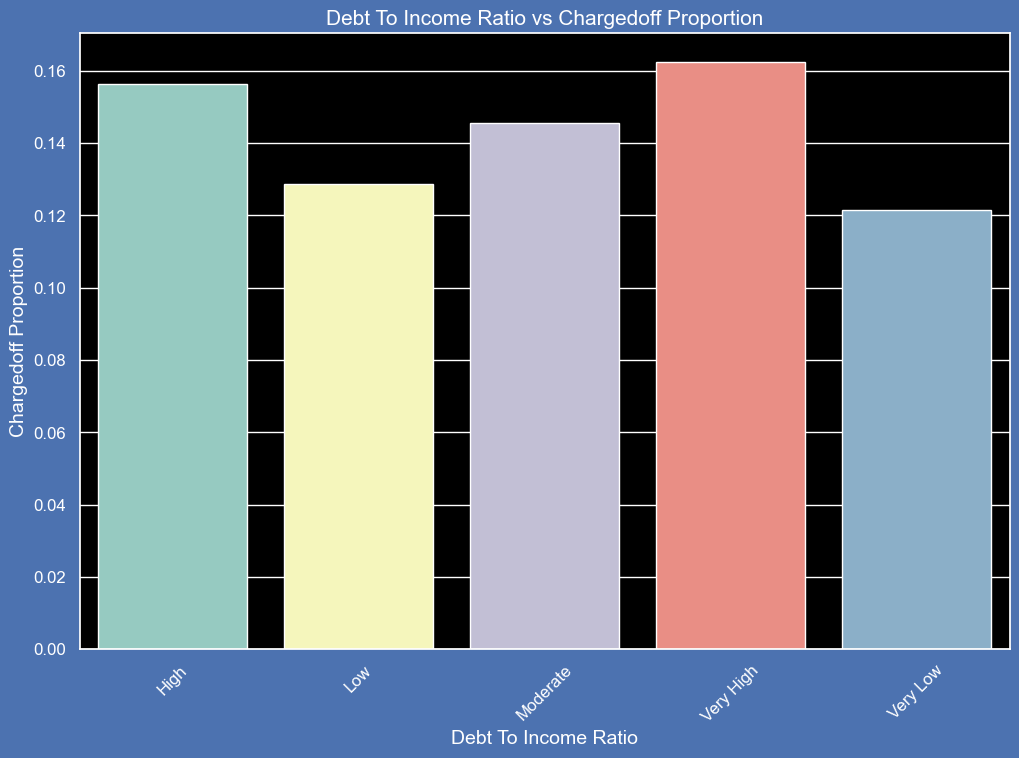

In [1719]:
fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='dti_b',y ='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [1720]:
#debt to income ration follow postive correlation with the defaults
# higher the debt to income higher the defaulters and vice-versa


In [1721]:
loan_df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

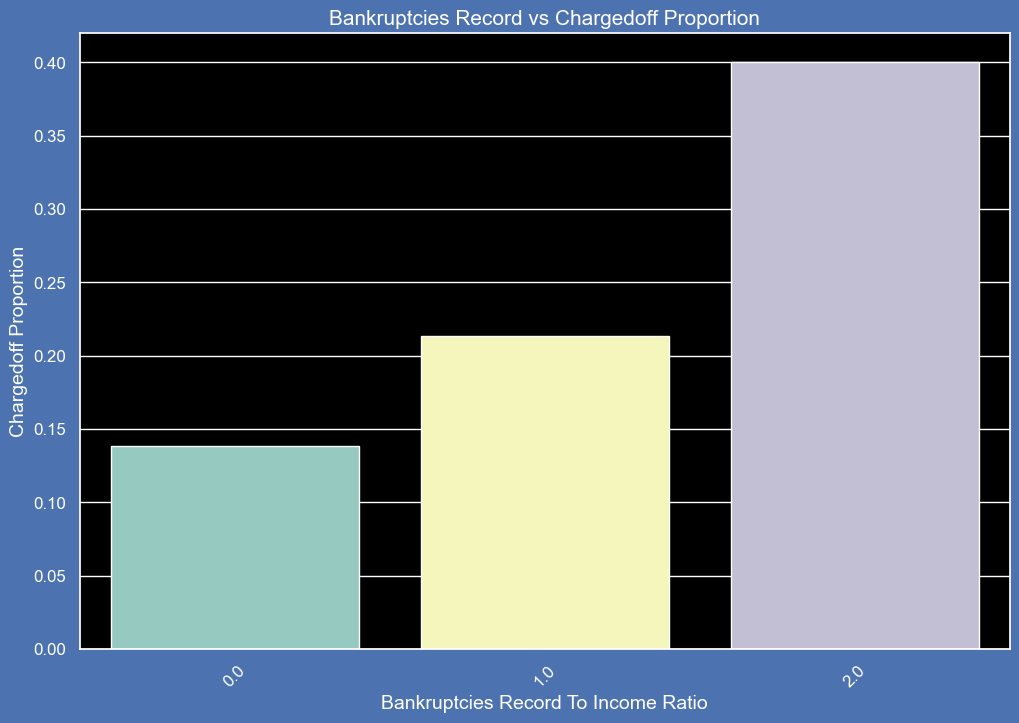

In [1722]:
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion']= pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='pub_rec_bankruptcies',y ='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [1723]:
#lower the bankruptcies recored lowers the risk and vice-versa

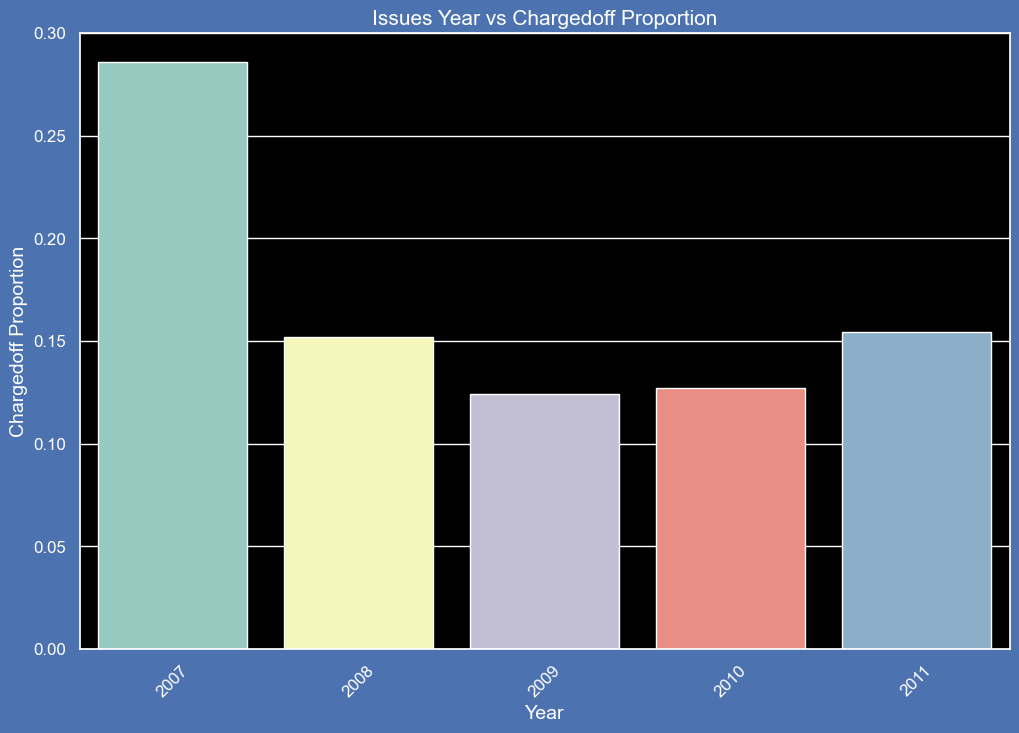

In [1724]:
issue_year_vs_loan = loan_df.groupby(['issue_year','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion']= issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Issues Year vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='issue_year',y ='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Year',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [1725]:
#most applicants became defaulter in 2007 and therby defaulters are increased following that year

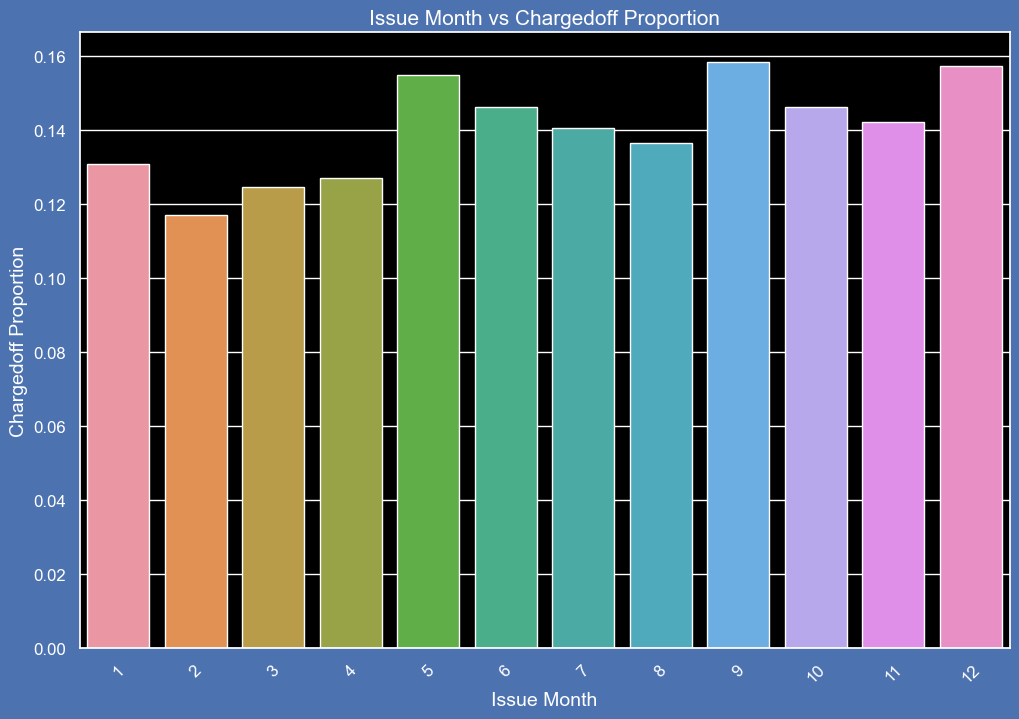

In [1726]:
issue_month_vs_loan = loan_df.groupby(['issue_month','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion']= issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Issue Month vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='issue_month',y ='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Issue Month',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [1727]:
#most of the defaults coming in the year end as compare to year beginning

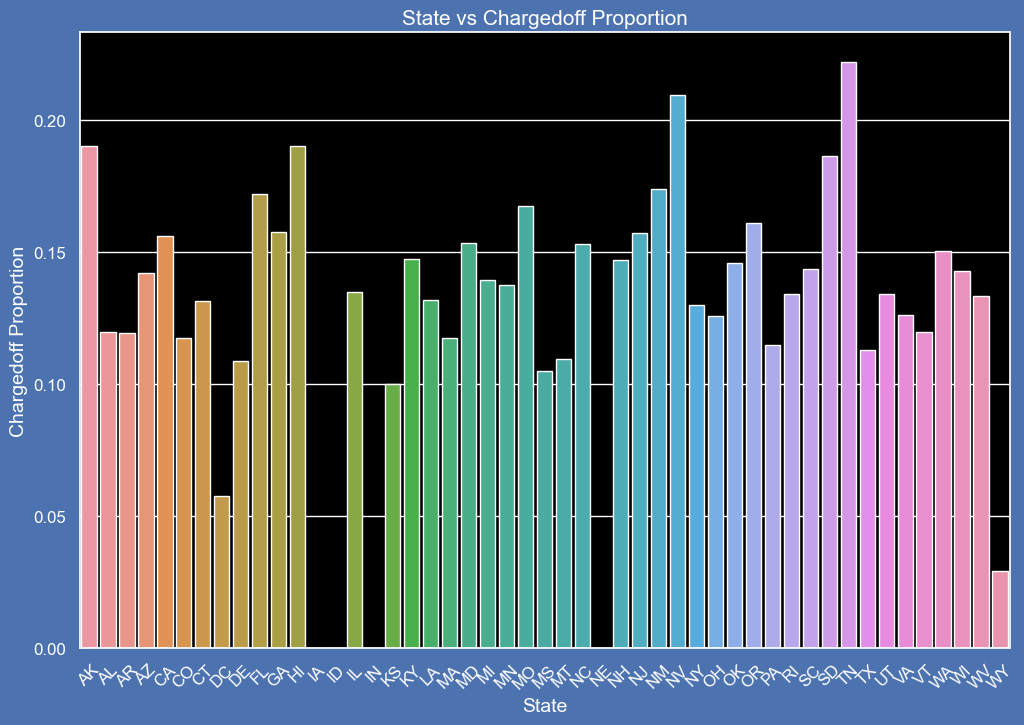

In [1728]:
addr_state_vs_loan = loan_df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion']= addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('State vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='addr_state',y ='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('State',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [1729]:
#most people belongs to sc to tc state have maximum defaults.
# state from ak to ca is having less defaults

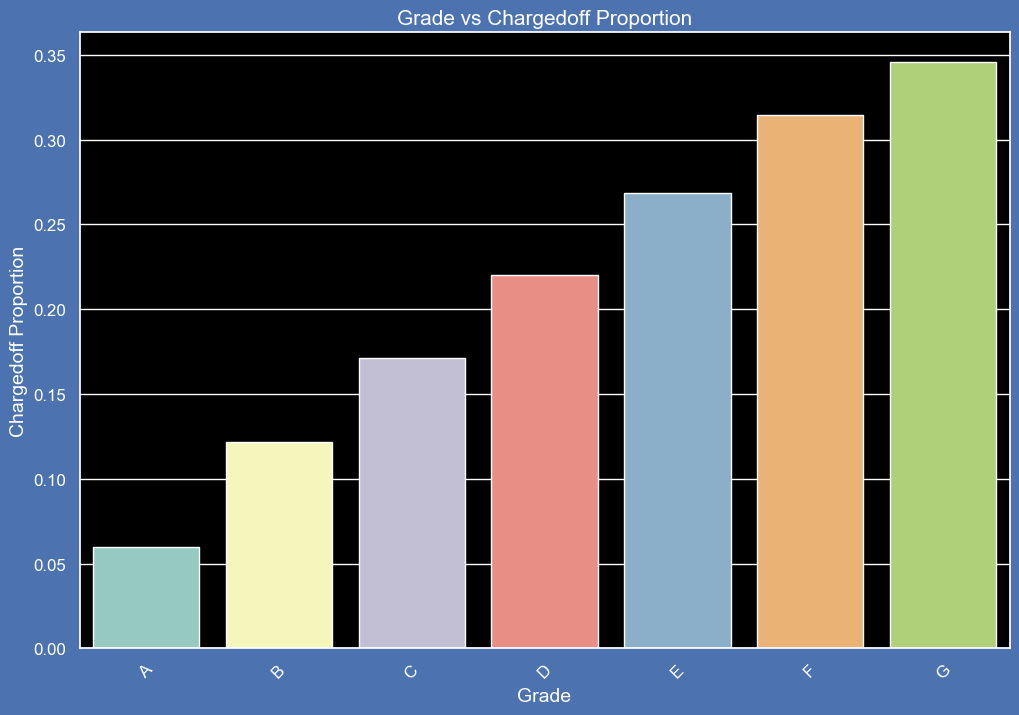

In [1730]:
grade_vs_loan = loan_df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion']= grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Grade vs Chargedoff Proportion', fontsize=15,color ='w')
ax1 = sns.barplot(x='grade',y ='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='w')
ax1.set_xlabel('Grade',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [1731]:
#starting from grade a to g loan defaults is moving in ascending orders
#grade g being max loan defaults and grade a being min loan defaults

# 7. <U> Correlation Analysis</u>

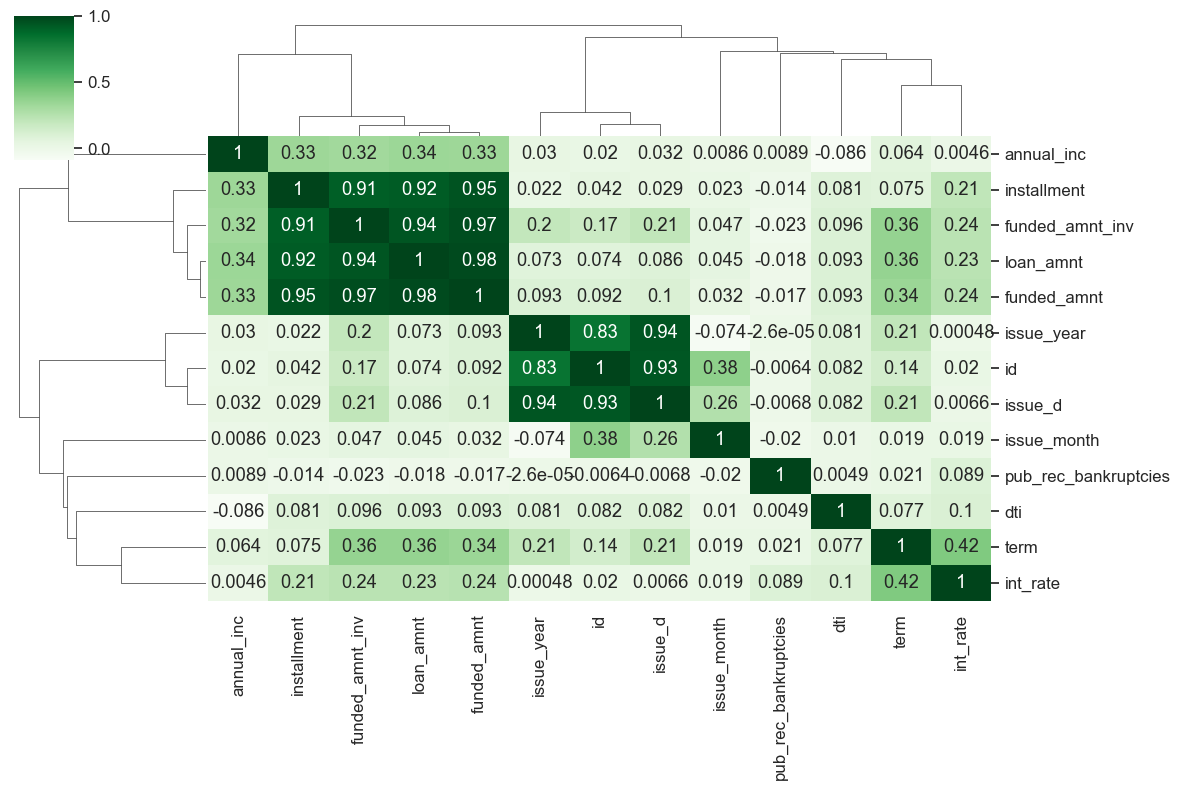

In [1732]:
drop_cols=['term','issue_d']
loan_df1 =loan_df.drop(columns =drop_cols)
loan_df1 = loan_df.select_dtypes(exclude=[object])
loan_df1 = loan_df1.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_df1, annot = True, figsize =(12,8), cmap="Greens")
plot.show()




In [1733]:
#loan amount is postively correlated with annual income i.e, the applicants having more income will be given more loan
#higher annual income is negatively correlated with pub rev bankruptcies.

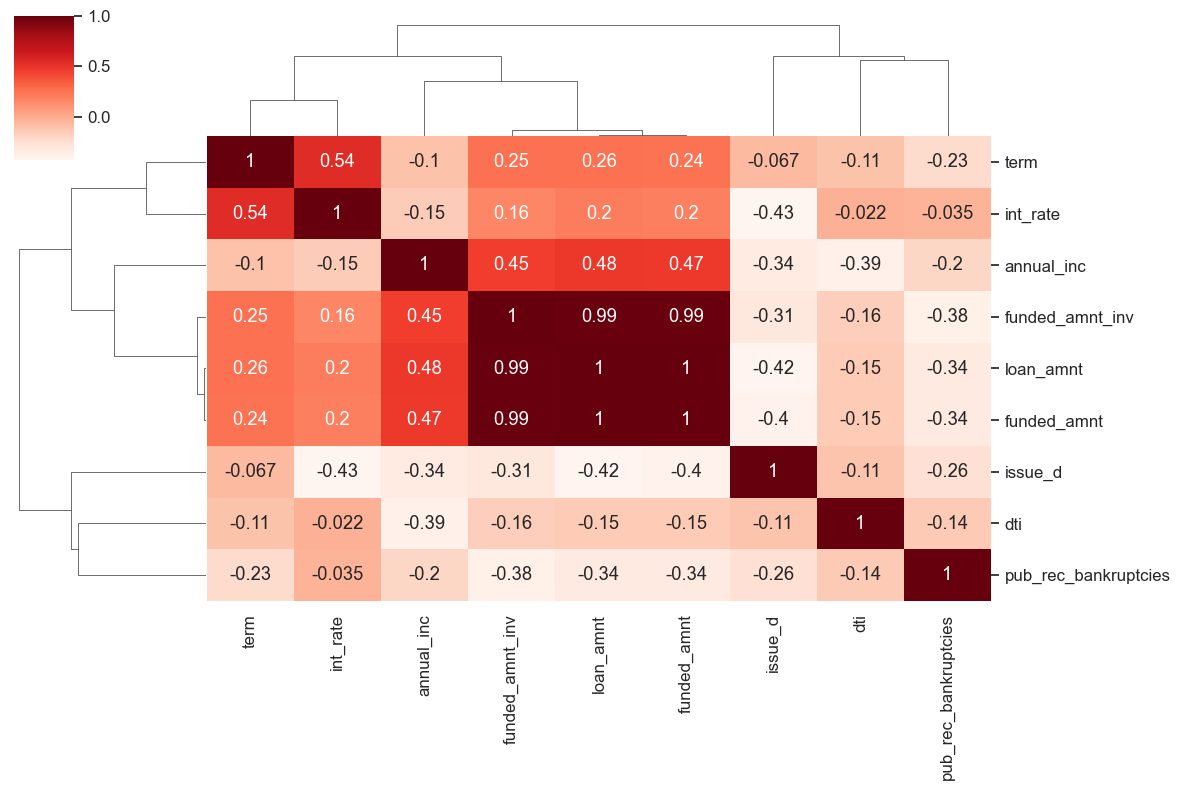

In [1734]:
drop_columns = ['installment','id','issue_year','issue_month']
loan_df1 = loan_df1.drop(columns = drop_columns)
loan_df1 = loan_df1.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_df1, annot =True, figsize=(12,8), cmap="Reds")

In [1735]:
#funded amount is positvely correlated with annual income
#the factors that makes you the most eligible applicants for the loan is high annual income.

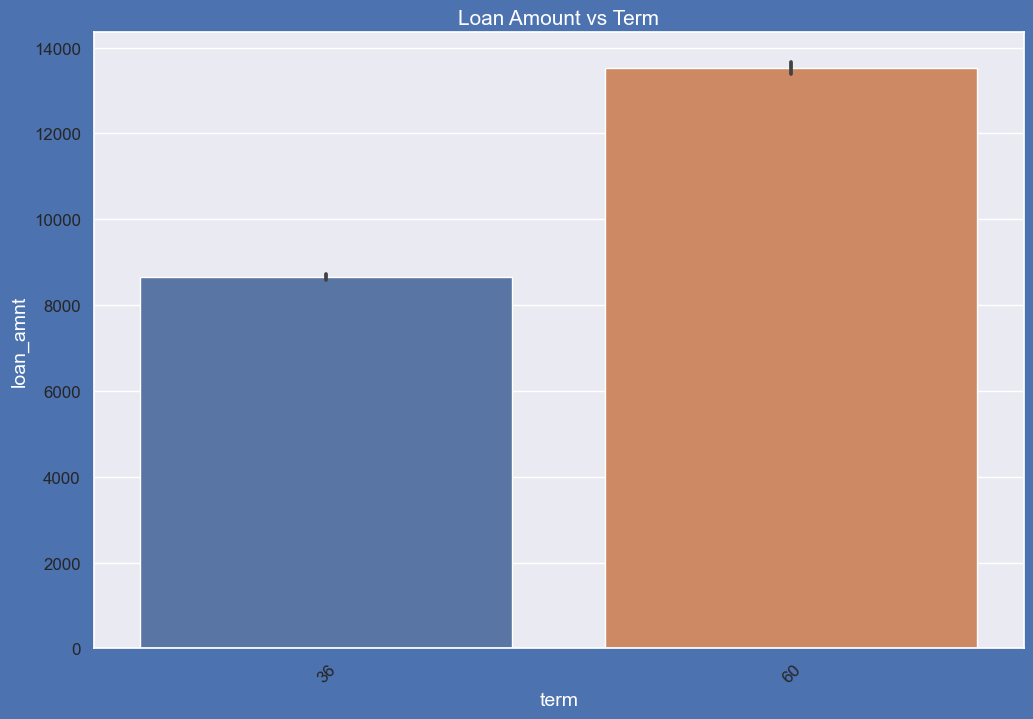

In [1736]:

fig, ax1 = plot.subplots(figsize=(12,8),facecolor ='b')
ax1.set_title('Loan Amount vs Term', fontsize=15,color ='w')
ax1 = sns.barplot(x='term',y ='loan_amnt', data=loan_df)
ax1.set_ylabel('loan_amnt',fontsize=14,color='w')
ax1.set_xlabel('term',fontsize=14,color='w')
plot.xticks(rotation =45)
plot.show()

In [ ]:
#higher the loan amount with context of term the chances of charged off are more and vice versa

<Axes: xlabel='term', ylabel='int_rate'>

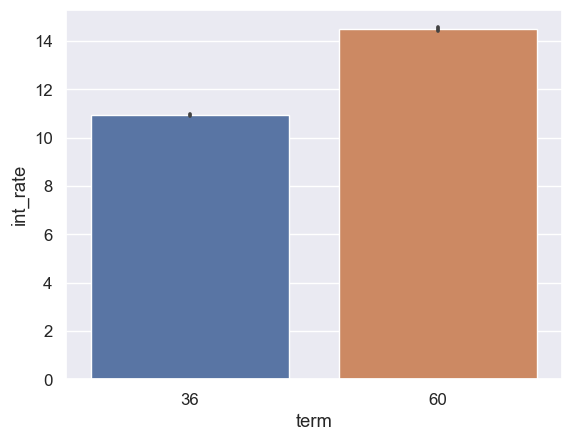

In [1737]:
sns.barplot(x='term',y='int_rate',data=loan_df)


In [ ]:
#higher the rate of interest ,higher the chances of defaults..